In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

In [176]:
cd = pd.read_csv("C:\\Users\cflun\Desktop\Data Analyst 2023\Git Repo\car-selling-price\car data.csv")

In [177]:
cd

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [178]:
# Check the first few rows of the dataset
cd.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [179]:

# Check the summary statistics of the numerical variables
cd.describe()


,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [180]:

# Check the data types and missing values
cd.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


<AxesSubplot:xlabel='Selling_Price', ylabel='Count'>

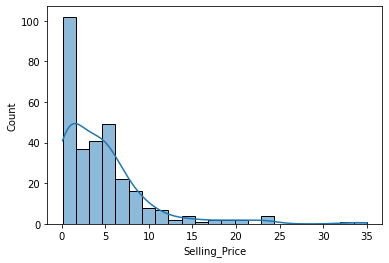

In [181]:

# Visualize the distribution of the target variable
sns.histplot(cd['Selling_Price'], kde=True)


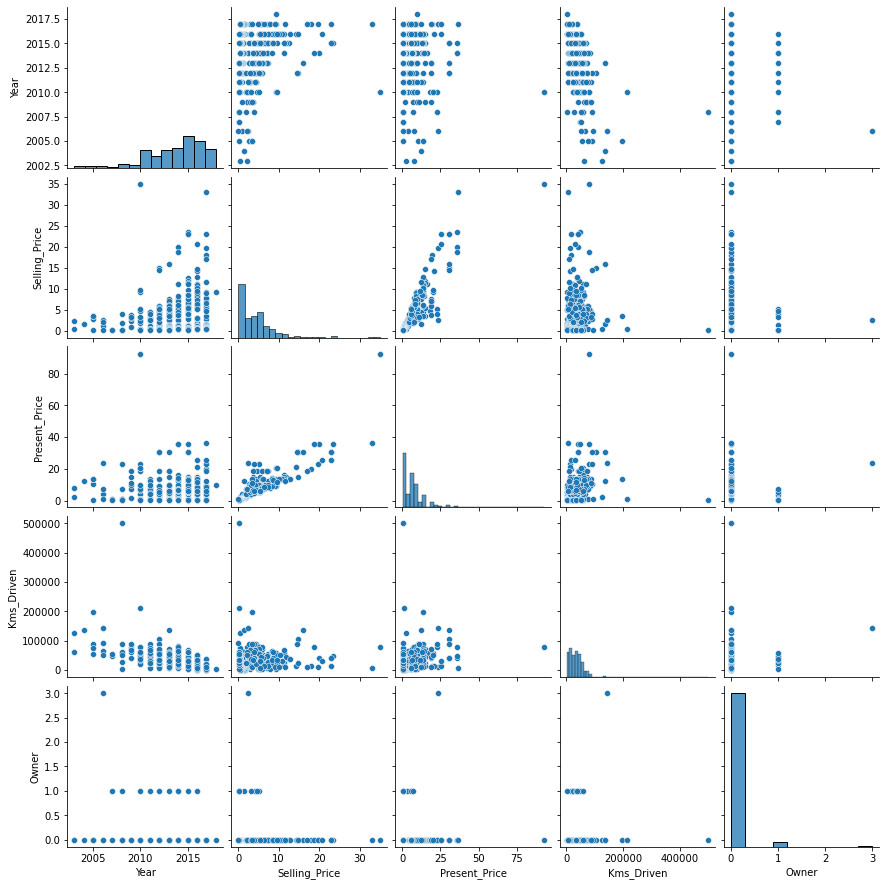

In [182]:

# Explore the relationships between variables using scatter plots or other appropriate visualizations
sns.pairplot(cd)


<AxesSubplot:>

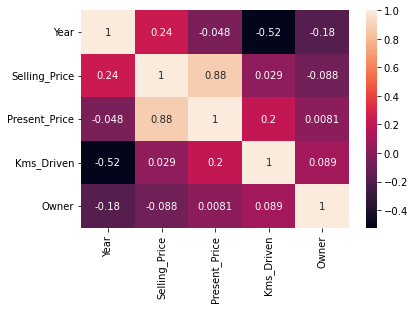

In [183]:

# Check the correlation between variables
corr_matrix = cd.corr()
sns.heatmap(corr_matrix, annot=True)

In [184]:
# Check for missing values
cd.isnull().sum()


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [185]:
# If there are missing values, handle them appropriately (e.g., by imputation or dropping the rows/columns)
cd = cd.dropna()

In [186]:
cd.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [187]:

cd_drop = ['Car_Name', 'Year', 'Kms_Driven']

# Drop the columns
cd = cd.drop(cd_drop, axis=1)

In [188]:
cd

,Selling_Price,Present_Price,Fuel_Type,Seller_Type,Transmission,Owner
0,3.35,5.59,Petrol,Dealer,Manual,0
1,4.75,9.54,Diesel,Dealer,Manual,0
2,7.25,9.85,Petrol,Dealer,Manual,0
3,2.85,4.15,Petrol,Dealer,Manual,0
4,4.60,6.87,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...
296,9.50,11.60,Diesel,Dealer,Manual,0
297,4.00,5.90,Petrol,Dealer,Manual,0
298,3.35,11.00,Petrol,Dealer,Manual,0
299,11.50,12.50,Diesel,Dealer,Manual,0


In [208]:
# Convert categorical variables into dummy variables
cd = pd.get_dummies(cd, drop_first=False)

# Encoding "Fuel_type" Column
car_dataset.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}},inplace=True)
car_dataset.replace({'Seller_Type':{'Dealer':0, 'Individual':1}},inplace=True)
car_dataset.replace({'Transmission':{'Manual':0, 'Automatic':1}},inplace=True)

In [209]:
cd

,Selling_Price,Present_Price,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,3.35,5.59,0,0,0,1,1,0,0,1
1,4.75,9.54,0,0,1,0,1,0,0,1
2,7.25,9.85,0,0,0,1,1,0,0,1
3,2.85,4.15,0,0,0,1,1,0,0,1
4,4.60,6.87,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,0,0,1,0,1,0,0,1
297,4.00,5.90,0,0,0,1,1,0,0,1
298,3.35,11.00,0,0,0,1,1,0,0,1
299,11.50,12.50,0,0,1,0,1,0,0,1


In [205]:
cd['Owner'].value_counts()

0    290
1     10
2      1
Name: Owner, dtype: int64

In [206]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Owner' column
cd['Owner'] = label_encoder.fit_transform(cd['Owner'])

In [207]:
cd

,Selling_Price,Present_Price,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,3.35,5.59,0,0,0,1,1,0,0,1
1,4.75,9.54,0,0,1,0,1,0,0,1
2,7.25,9.85,0,0,0,1,1,0,0,1
3,2.85,4.15,0,0,0,1,1,0,0,1
4,4.60,6.87,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,0,0,1,0,1,0,0,1
297,4.00,5.90,0,0,0,1,1,0,0,1
298,3.35,11.00,0,0,0,1,1,0,0,1
299,11.50,12.50,0,0,1,0,1,0,0,1


In [210]:
#Split the dataset into training and test sets:

X = cd.drop(['Selling_Price'], axis=1)
Y = cd['Selling_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

In [211]:
#Apply the Multiple Linear Regression model:

# Fit the linear regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = linear_reg.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression:")
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Linear Regression:
Mean Squared Error: 5.760799108677559
R-squared: 0.791563579325787


In [212]:
#Apply Ridge regression:

# Fit the Ridge regression model
ridge_reg = Ridge(alpha=1.0)  # You can experiment with different alpha values
ridge_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_ridge = ridge_reg.predict(X_test)

# Calculate metrics
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression:")
print("Mean Squared Error:", mse_ridge)
print("R-squared:", r2_ridge)

Ridge Regression:
Mean Squared Error: 5.773562775724064
R-squared: 0.7911017661252809


In [213]:
#Apply Lasso regression:

# Fit the Lasso regression model
lasso_reg = Lasso(alpha=1.0)  # You can experiment with different alpha values
lasso_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_lasso = lasso_reg.predict(X_test)

# Calculate metrics
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Lasso Regression:")
print("Mean Squared Error:", mse_lasso)
print("R-squared:", r2_lasso)

Lasso Regression:
Mean Squared Error: 6.816774680645218
R-squared: 0.7533564201473323


In [214]:
#Apply ElasticNet regression:

# Fit the ElasticNet regression model
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5)  # You can experiment with different alpha and l1_ratio values
elastic_net.fit(X_train, y_train)

# Predict on the test set
y_pred_elastic = elastic_net.predict(X_test)

# Calculate metrics
mse_elastic = mean_squared_error(y_test, y_pred_elastic)
r2_elastic = r2_score(y_test, y_pred_elastic)

print("ElasticNet Regression:")
print("Mean Squared Error:", mse_elastic)
print("R-squared:", r2_elastic)

ElasticNet Regression:
Mean Squared Error: 6.860336582335871
R-squared: 0.7517802695656387


In [215]:
#Get the feature importance:

# Get feature importance from the linear regression model
feature_importance = pd.DataFrame(linear_reg.coef_, index=X_train.columns, columns=['Importance'])
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)

                          Importance
Transmission_Automatic  9.492149e-01
Seller_Type_Dealer      9.005491e-01
Fuel_Type_Diesel        4.641748e-01
Present_Price           4.318064e-01
Fuel_Type_CNG           2.775558e-16
Fuel_Type_Petrol       -4.641748e-01
Owner                  -5.241563e-01
Seller_Type_Individual -9.005491e-01
Transmission_Manual    -9.492149e-01


In [216]:
#Compare all the models using the Sum of Squared Error metric:

print("Sum of Squared Error (MSE) for different models:")
print("Linear Regression:", mse)
print("Ridge Regression:", mse_ridge)
print("Lasso Regression:", mse_lasso)
print("ElasticNet Regression:", mse_elastic)

Sum of Squared Error (MSE) for different models:
Linear Regression: 5.760799108677559
Ridge Regression: 5.773562775724064
Lasso Regression: 6.816774680645218
ElasticNet Regression: 6.860336582335871


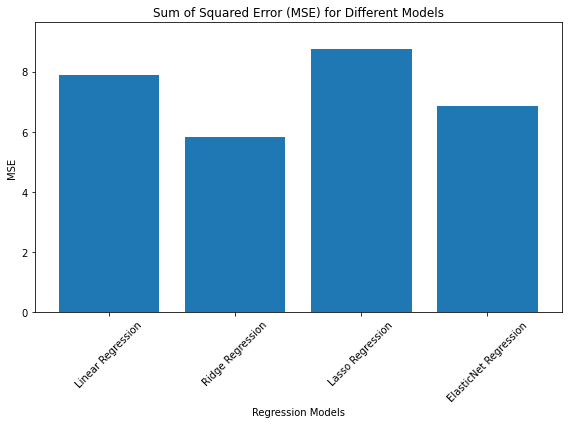

In [217]:
import matplotlib.pyplot as plt

# Define the models and MSE values
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'ElasticNet Regression']
mse_values = [7.8743759395630315, 5.818974730882818, 8.755658640384594, 6.860336582335871]

# Plot the MSE values
plt.figure(figsize=(8, 6))
plt.bar(models, mse_values)
plt.title('Sum of Squared Error (MSE) for Different Models')
plt.xlabel('Regression Models')
plt.ylabel('MSE')
plt.ylim(0, max(mse_values) * 1.1)  # Adjust the y-axis limits if needed
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()






In the code above, we define the models list to hold the names of the regression models, and the mse_values list to hold the corresponding MSE values.

Then, we create a bar plot using plt.bar(models, mse_values). We set the plot title, x-axis label, and y-axis label using plt.title(), plt.xlabel(), and plt.ylabel() respectively.

The plt.ylim(0, max(mse_values) * 1.1) line adjusts the y-axis limits to ensure all bars are visible. You can modify this line if needed.

Finally, plt.xticks(rotation=45) rotates the x-axis labels by 45 degrees for better readability, and plt.tight_layout() ensures that the plot elements are properly spaced.

Running this code will generate a bar plot showing the MSE values for different regression models. Each bar